In [23]:
import numpy as np
import string
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display
import pprint as pprint

In [24]:
# reading the details .txt produced by first proc
myfile = open("x64/Debug/p_0_details.txt")
file = myfile.read()
myfile.close()
details = file.split("_")
# determine the number of procs for array initialisation of parameters (shown in)
num_procs = int(details[3])
print(num_procs)
print(details)

4
['0', '50', '50', '4', '100', '100', '2', '2', '0', '0']


In [25]:
#initialising arrays for details of individual procs
filenames = []
proc_id = np.empty(num_procs)
imax = np.empty(num_procs)
jmax = np.empty(num_procs)
m = np.empty(num_procs)
n = np.empty(num_procs)
id_row = np.empty(num_procs)
id_col = np.empty(num_procs)
local_rows = np.empty(num_procs)
local_cols = np.empty(num_procs)

In [26]:
# getting specific details of each proc and storing contiguously 
# e.g. local_rows, id_row stored in position [i] of relevant arrays
# matching proc_id etc.

for i in range(num_procs):
    filenames.append("x64/Debug/p_" + str(i) + "_details.txt")
    myfile = open(filenames[i])
    file = myfile.read()
    myfile.close()
    details = file.split("_")
    #print(details)
    proc_id[i] = int(details[0])
    local_rows[i] = int(details[1]) 
    local_cols[i] = int(details[2]) 
    imax[i] = details[4]
    jmax[i] = details[5]
    m[i] = details[6]
    n[i] = details[7]
    id_row[i] = details[8]
    id_col[i] = details[-1]
print(filenames)
print("\n",local_rows)
print(imax)
print(num_procs)

['x64/Debug/p_0_details.txt', 'x64/Debug/p_1_details.txt', 'x64/Debug/p_2_details.txt', 'x64/Debug/p_3_details.txt']

 [50. 50. 50. 50.]
[100. 100. 100. 100.]
4


In [27]:
# combining data from each process for each iteration into a single grid
# allocating the correct data point from each of the subdomains 
# into their respective place within the larger (imax x jmax) grid

print(int(imax[0]))
print(np.isclose(int(imax[0]), jmax[0]))
def iteration(itera):
    filenames = []
    grid = np.zeros((int(imax[0]), int(jmax[0])))
    procs = np.array(num_procs)
    for i in range(num_procs):
        filenames.append("x64/Debug/p_" + str(i) + "_output.txt")
        myfile = open(filenames[i])
        file = myfile.read()
        myfile.close()
        data = file.split("/it/") # determines where the next iteration begins
        values = data[itera][1:].split(",") # seperation of vals
        values = [float(j) for j in values] #convert strings into floats
        values = np.array(values)
        it = values.reshape(int(local_rows[i]) + 2, int(local_cols[i]) + 2) # reshapes the array into the buffered shape
        it = it[1:-1, 1:-1] # removal of buffer layers
        # stores the subdomain vals in their respective pos in large grid
        grid[int(id_row[i]*local_rows[i]):int((id_row[i]+1)*local_rows[i]), int(id_col[i]*local_cols[i]):int((id_col[i]+1)*local_cols[i])]  = it
    #pprint.pprint(grid)
    return grid

it = iteration(i)

100
True


<IPython.core.display.Javascript object>


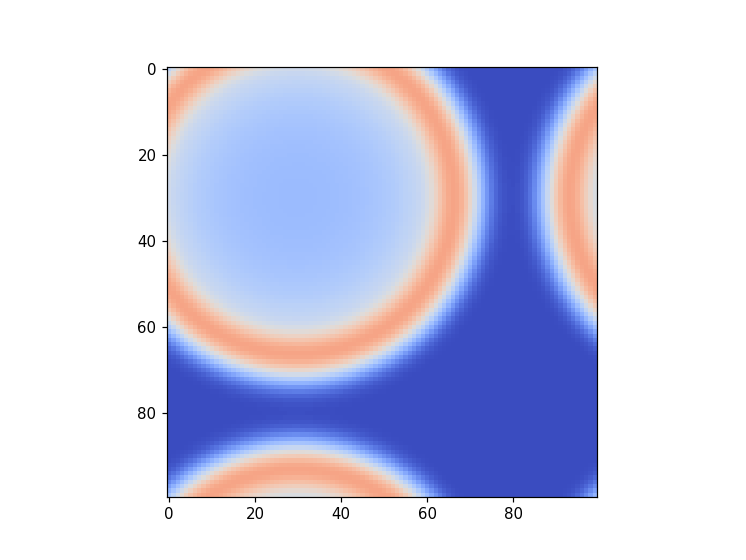

In [28]:
# Required line for plotting the animation
%matplotlib notebook

def update(i, img):
    it = iteration(i)
    img.set_data(it)
    
# function makes an update returning the next image
def animate(frame):
    im.set_data(update_board(my_board))
    return im,

# set up animation
fig, ax = plt.subplots() 
img = ax.imshow(it, cmap='coolwarm')

anim = animation.FuncAnimation(fig, update, fargs=(img, ), frames = 350, interval=1, save_count=50)

# # saving hte animation as a gif in the relevant animations folder
# #--uncomment this section below to save the anim---
# f = r"./animations/wave.gif" 
# writergif = animation.PillowWriter(fps=50) 
# anim.save(f, writer=writergif)
# #--------------------------------------------#

plt.show()